In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.special import kn
import INDEX

In [ ]:
#model parameters
m_DM = 700 #mass of the DM particle, in GeV
m_z = 700 #partner Z mass, in GeV
crosssection_DMDM = 4 * 10**(-9) #cross-section for self-annihilation of DM (DM + DM -> SM + SM)
crosssection_DMz = 0 #cross-section for co-annihilation (DM + Z -> SM + SM)
decaywidth_z = 0 #decay width of particle Z, for reaction Z -> DM + SM
gamma_z = 0 #Reaction rate for conversion process (Z + SM -> SM + DM)
crosssection_DMDMzz = 0 #cross-section for double-conversion reaction (Z + Z -> DM + DM)
crosssection_zz = 0 #cross-section for self-annihilation of Z (Z + Z -> SM + SM)
g_DM = 1 #DM degrees of freedom
g_z = 1 #Z degrees of freedom
T = np.linspace(1600, 2, 9000) #temperature range, in GeV

In [10]:
#Boltzmann Equation, for the parameters given above
def Boltzmann(w, x, *args):
    Y_DM, Y_z = w #tuple for yields
    s = INDEX.entropy(m_DM/x) #entropy density, recalculated for each x value
    Y_eq_DM = INDEX.equilibrium_yield(m_DM, (m_DM/x), g_DM, 0) #equilibrium yield for particle X, where (m_DM/x) is the temperature
    Y_eq_z = INDEX.equilibrium_yield(m_z, (m_DM/x), g_z, 0) #equilibrium yield for particle Z, where (m_DM/x) is the temperature. 
    hubble_constant = INDEX.hubble(m_DM/x) #hubble constant for each x value
    ds_dx = INDEX.dsdx(x, m_DM) #variation of entropy density with x
    x_z = (m_z * x) / m_DM #argument for bessel functions, equals to m_z/T
    a = crosssection_DMDM * (Y_DM**2 - Y_eq_DM**2) #self-annihilation DM + DM -> SM + SM
    b = crosssection_DMz * (Y_DM * Y_z - Y_eq_DM * Y_eq_z) #co-annihilation DM + Z -> SM + SM
    c = (kn(1, x_z)/kn(2, x_z)) * (decaywidth_z/s) * (Y_z - Y_DM * (Y_eq_z/Y_eq_DM)) #decay Z -> DM + SM
    d = (gamma_z/s) * (Y_z - Y_DM *(Y_eq_z/Y_eq_DM)) #scatering Z + SM -> DM + SM
    e = (crosssection_DMDMzz * (Y_z**2 - Y_DM**2 *(Y_eq_z/Y_eq_DM)**2)) #conversion Z + Z -> DM + DM
    f = (crosssection_zz) * (Y_z**2 - Y_eq_z**2) #self-annihilation Z + Z -> SM + SM
    dY_DM = ((1/(3*hubble_constant)) * ds_dx *
              (a + b - c - d - e))
    dY_z = ((1/(3*hubble_constant)) * ds_dx *( f + b + c + d + e))
    return dY_DM, dY_z

2.877354276620515e-13


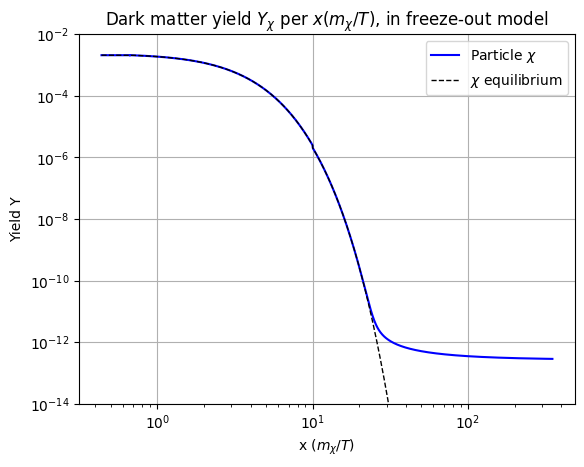

In [13]:
#variables
x = m_chi/T #integration variable x
y0_DM = INDEX.equilibrium_yield(m_DM,T[0], g_DM, 0) #inicial value of Y_DM. we consider DM to be in equilibrium at t=0
y0_z = INDEX.equilibrium_yield(m_z, T[0], g_z, 0) #inicial value of Y_z. we consider z to be in equilibrium at t=0
p =(crosssection_DMDM, crosssection_DMz, decaywidth_z, gamma_z, crosssection_DMDMzz, crosssection_zz, m_DM, m_z, g_DM, g_z) #list of arguments for integration

#lists, to save the solution from numerical integration
sol_chi= list()
sol_z= list()

#numerical integration
sol = odeint(Boltzmann, [y0_DM, y0_z], x, args=(p), atol = 10**(-16), rtol = 10**(-14))

#saving solutions from integration on lists
for i in range(0,9000):
    sol_chi.append(sol1[i][0])
    sol_z.append(sol1[i][1])

#calculating the equilibrium value for DM
equilibrium_DM = list()
equilibrium_z = list()
for j in range(0,9000):
    y = INDEX.equilibrium_yield(m_DM, T[j], g_DM, 0)
    equilibrium_DM.append(y)
for k in range(0,9000):
    y = INDEX.equilibrium_yield(m_z, T[k], g_z, 0)
    equilibrium_z.append(y)
    
#plot
plt.plot(x, sol_DM, label=r'DM Particle', color='blue')
plt.plot(x, sol_z, label=r'Particle Z')
plt.plot(x, equilibrium_DM,linestyle="dashed", linewidth=1, color='k', label=r'DM equilibrium')
plt.plot(x, equilibrium_z, linestyle="dashed", linewidth=1, color='k', label=r'Z equilibrium')
plt.title("Dark matter yield $Y_{\chi}$ and Particle Z yield $Y_Z$ per $x (m_{\chi}/T)$, in freeze-out model")
plt.xlabel(r'x $(m_{\chi}/T)$')
plt.ylim(10e-15, 10e-3)
plt.ylabel('Yield Y')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid()
#plt.savefig('Figures/freezeout.png', dpi = 300)